In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importe de dados

In [88]:
# Importe do dataset
df_animes = pd.read_csv('anime.csv')

## Descrição dos datasets

## Análise Exploratória de Dados (EDA)

In [3]:
# Primeiro contato com o dataset, visualizando o conteúdo e como estão distribuidas as features
df_animes.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [6]:
# Features
df_animes.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [7]:
# Verificando o tipo das features
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [89]:
# Renomeando as features e transformando tudo em minúsculo para facilitar a utilização
df_animes.rename(columns = {'MAL_ID':'anime_id'}, inplace=True)
df_animes.rename(columns = str.lower, inplace = True)
columns = ['anime_id','name','premiered', 'score','genres','type', 'episodes', 'studios','source','rating','popularity',\
          'members','completed','on-hold','dropped', 'members']
df_animes = df_animes[columns]

# Reparando a feature premiered em season e year e posteriormente dropando ela
df_animes[['season','year']] = df_animes['premiered'].str.split(' ', n=1, expand=True) \
                                .rename(columns={0:'season',1:'year'})
df_animes.drop('premiered', axis=1, inplace=True)

# Transformando a coluna year em int
df_animes['year'] = pd.to_numeric(df_animes['year'])

In [90]:
# Quantidade de nulos por feature
df_animes.isna().sum()

anime_id          0
name              0
score             0
genres            0
type              0
episodes          0
studios           0
source            0
rating            0
popularity        0
members           0
completed         0
on-hold           0
dropped           0
members           0
season            0
year          12817
dtype: int64

In [16]:
df_animes.head(2)

,anime_id,name,premiered,score,genres,type,episodes,studios,source,rating,popularity,members,completed,on-hold,dropped
0,1,Cowboy Bebop,Spring 1998,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Sunrise,Original,R - 17+ (violence & profanity),39,1251960,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,Unknown,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Bones,Original,R - 17+ (violence & profanity),518,273145,208333,1935,770


In [91]:
# Verificando as estatísticas básicas das features numéricas
df_animes.describe()

,anime_id,popularity,members,completed,on-hold,dropped,members,year
count,17562.000000,17562.000000,1.756200e+04,1.756200e+04,17562.000000,17562.000000,1.756200e+04,4745.000000
mean,21477.192347,8763.452340,3.465854e+04,2.209557e+04,955.049653,1176.599533,3.465854e+04,2006.313593
std,14900.093170,5059.327278,1.252821e+05,9.100919e+04,4275.675096,4740.348653,1.252821e+05,12.898287
min,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1961.000000
25%,5953.500000,4383.500000,3.360000e+02,1.110000e+02,6.000000,37.000000,3.360000e+02,2001.000000
50%,22820.000000,8762.500000,2.065000e+03,8.175000e+02,45.000000,77.000000,2.065000e+03,2010.000000
75%,35624.750000,13145.000000,1.322325e+04,6.478000e+03,291.750000,271.000000,1.322325e+04,2016.000000
max,48492.000000,17565.000000,2.589552e+06,2.182587e+06,187919.000000,174710.000000,2.589552e+06,2021.000000


In [115]:
# Verificndo a quantidade de produções por tipo, fonte, classificação etária, temporada e Ano de lançamento
for feature in ['type','source','rating','season','year']:
    display(pd.DataFrame(df_animes['anime_id'].groupby(df_animes[feature]).count().sort_values(ascending=False)) \
            .rename(columns={'anime_id':'quantidade'}))

,quantidade
type,
TV,4996
OVA,3894
Movie,3041
Special,2218
ONA,1907
Music,1469
Unknown,37


,quantidade
source,
Original,5215
Manga,3825
Unknown,3567
Visual novel,993
Game,880
Light novel,768
Other,597
Novel,510
Music,317


,quantidade
rating,
PG-13 - Teens 13 or older,6132
G - All Ages,5782
PG - Children,1461
Rx - Hentai,1345
R - 17+ (violence & profanity),1157
R+ - Mild Nudity,997
Unknown,688


,quantidade
season,
Unknown,12817
Spring,1611
Fall,1389
Winter,942
Summer,803


,quantidade
year,
2017,266
2016,262
2018,257
2015,229
2014,227
...,...
1966,11
1963,5
1964,4


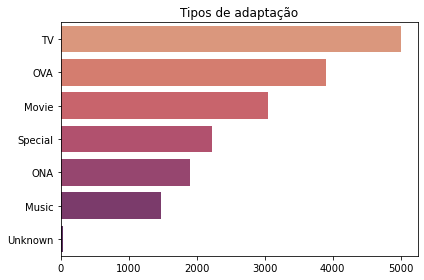

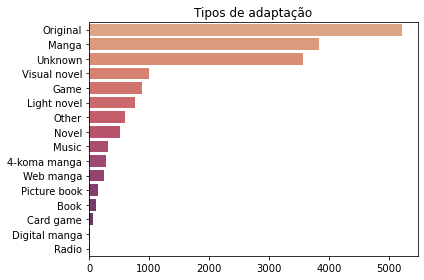

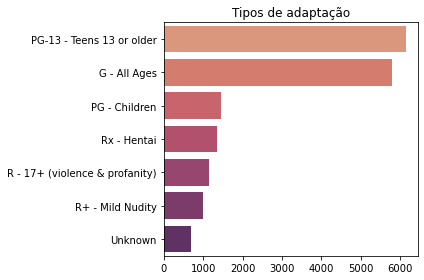

In [69]:
# Visualizando a quantidade de produções de acordo com os tipos, fontes e classificação etária 
for feature in ['type','source','rating']:
    anime_feature_count = df_animes[feature].value_counts()
    sns.barplot(x=anime_feature_count.values,
                y=anime_feature_count.index,
                palette='flare') \
                .set_title('Tipos de adaptação')
    plt.tight_layout()
    plt.show()

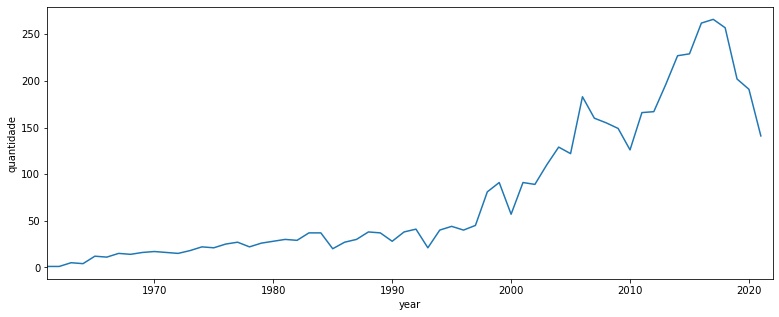

In [86]:
# Visualizando o crescimento da produção de animes
year = pd.DataFrame(df_animes['year'].groupby(df_animes['year']).count()).rename(columns={'year':'quantidade'})
sns.lineplot(data=year,
               x=year.index,
               y=year['quantidade']);

## Ajuste de tamanho do gráfico
plt.gcf().set_size_inches(13, 5);
plt.xlim(1961,2022);

In [103]:
# Os 10 animes mais bem avaliados, sendo necessário haver no mínimo 700.000 membros, foram considerados todos os
# tipos de produção

df_animes[['name','score','genres','type', 'episodes', 'studios','source','rating',\
          'members']].sort_values(by='score', ascending = False).query('members > (700000)').head(10)

,name,score,genres,type,episodes,studios,source,rating,members,members
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,Bones,Manga,R - 17+ (violence & profanity),2248456,2248456
15926,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",TV,16,MAPPA,Manga,R - 17+ (violence & profanity),733260,733260
5683,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,1771162,1771162
6474,Hunter x Hunter (2011),9.1,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,Madhouse,Manga,PG-13 - Teens 13 or older,1673924,1673924
14963,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),1073626,1073626
9886,Koe no Katachi,9.0,"Drama, School, Shounen",Movie,1,Kyoto Animation,Manga,PG-13 - Teens 13 or older,1387607,1387607
833,Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,Sunrise,Manga,PG-13 - Teens 13 or older,754607,754607
3537,Clannad: After Story,8.96,"Slice of Life, Comedy, Supernatural, Drama, Ro...",TV,24,Kyoto Animation,Visual novel,PG-13 - Teens 13 or older,915885,915885
11308,Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Movie,1,CoMix Wave Films,Original,PG-13 - Teens 13 or older,1726660,1726660
2656,Code Geass: Hangyaku no Lelouch R2,8.91,"Action, Military, Sci-Fi, Super Power, Drama, ...",TV,25,Sunrise,Original,R - 17+ (violence & profanity),1268320,1268320
